In [3]:
# 1. 지역별,연도별 주택 준공실적
def Construction(path,data_type):
    wb=xw.Book(path)
    sheet=wb.sheets(data_type)
    data_range='A3:N39'
    raw_data=sheet[data_range].options(pd.DataFrame,index=False,header=True).value
    
    data=raw_data.drop([0,1])
    clean_data=data.drop(['계'],axis=1)
    clean_data=clean_data[::2]
    clean_data=clean_data.T
    clean_data.columns=['서울','인천','경기','부산','대구','광주','대전','울산','세종','강원','충북','충남','전북','전남','경북','경남','제주']
    clean_data.drop(['구분'],inplace=True)
    
    index_list=list(clean_data.index)
    new_index=[]
    for num,index in enumerate(index_list):
        new_index.append('20'+data_type[:2]+'.'+index[:-1])
    clean_data.set_index(pd.to_datetime(new_index),inplace=True)
    return clean_data



In [4]:
#데이터 로드

path=r'C:\Users\ewsn9\Desktop\엑셀파일/★(05년-20년)준공_연도별,월별,지역별.xlsx'
data_type=['19년','20년']
data1=Construction(path,data_type[0])
data2=Construction(path,data_type[1])
data=pd.concat([data1,data2])
data

,서울,인천,경기,부산,대구,광주,대전,울산,세종,강원,충북,충남,전북,전남,경북,경남,제주
2019-01-01,4926,1316,16706,1709,259,1799,192,2565,453,2155,1002,972,3624,1357,5107,2448,1209
2019-02-01,12947,1520,13471,2944,844,2052,317,2757,1460,1615,341,1155,1976,370,2878,7530,457
2019-03-01,2898,1773,16475,2533,127,1153,60,78,211,1462,1395,670,843,2369,4005,542,639
2019-04-01,4160,721,13213,2416,2348,690,131,1245,1019,2315,1126,328,300,1412,2736,1284,585
2019-05-01,4259,1664,19111,3470,84,1761,79,1874,2068,894,369,1389,303,984,1111,4059,506
2019-06-01,6952,420,26884,2288,994,2287,1123,715,1218,762,501,1127,1538,746,431,3218,526
2019-07-01,5146,731,15071,3616,488,161,636,497,1101,1575,2984,3337,427,1890,1256,781,749
2019-08-01,4477,1081,13265,2290,418,912,1235,133,1434,2029,1673,986,411,1275,1458,2522,453
2019-09-01,10999,756,10679,2411,773,1922,556,1332,1761,1194,3135,493,2900,941,548,2687,679
2019-10-01,3701,1325,6800,2253,1614,477,1309,375,16,3456,1659,581,1398,927,2512,3353,453


In [ ]:
#그림 세팅

import pandas as pd
import xlwings as xw
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager,rc
from matplotlib import style
%matplotlib inline

font_name=font_manager.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
rc('font',family=font_name)
style.use('ggplot')

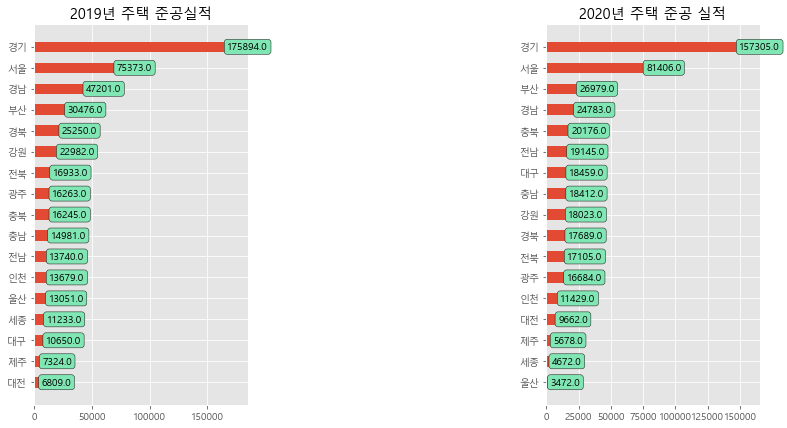

In [74]:
# 주택 준공실적 비교 그래프(막대 그래프)

fig=plt.figure(figsize=(13,7))
ind=np.arange(17)

data_2019=data['2019-1-1':'2019-12-1'].sum().sort_values()
data_2020=data['2020-1-1':'2020-12-1'].sum().sort_values()



ax=fig.add_subplot(1,3,1)
plt.title('2019년 주택 준공실적')
rects=plt.barh(ind,data_2019,align='center',height=0.5)
plt.yticks(ind,data_2019.index)
for i,rect in enumerate(rects):
    ax.text(0.95*rect.get_width(),rect.get_y()+rect.get_height() / 2.0,
           data_2019.values[i],ha='left',va='center',
           bbox=dict(boxstyle='round',fc=(0.5,0.9,0.7),ec='0.1'))
    
ax2=fig.add_subplot(1,3,3)
plt.title('2020년 주택 준공 실적')
rects=plt.barh(ind,data_2020.values,align='center',height=0.5)
plt.yticks(ind,data_2020.index)
for i,rect in enumerate(rects):
    ax2.text(0.95*rect.get_width(),rect.get_y()+rect.get_height() / 2.0,
            data_2020.values[i],ha='left',va='center',
            bbox=dict(boxstyle='round',fc=(0.5,0.9,0.7),ec='0.1'))
    
plt.savefig('주택준공실적.png',dpi=400,bbox_inches='tight')


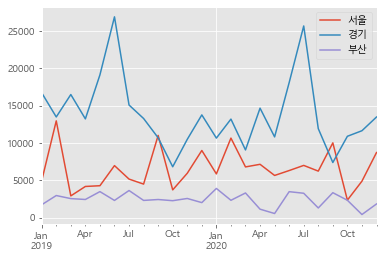

In [81]:
# 연도별, 지역별 그래프

spots=['서울','경기','부산']
for num,gu in enumerate(spots):
    data[gu].plot(legend=gu)
plt.show()

In [79]:
# 2. 지역별,연도별,규모별 주택 준공실적


'서울'

In [83]:
path=r'C:\Users\ewsn9\Desktop\엑셀파일\★(05년-20년)준공_연도별,규모별.xlsx'
wb=xw.Book(path)
sheet=wb.sheets('주택규모별 준공실적')
data_range='A3:Q97'
data_type=sheet[data_range].options(pd.DataFrame,index=False,header=True).value


In [84]:
data_type

,구 분,’05년,NaN,NaN,NaN,’06년,NaN,NaN,NaN,’07년,NaN,NaN,NaN,’08년,NaN,NaN,NaN
0,None,합 계,60㎡\n이하,60~85㎡이하,85㎡\n초과,합 계,60㎡\n이하,60~85㎡이하,85㎡\n초과,합 계,60㎡\n이하,60~85㎡이하,85㎡\n초과,합 계,60㎡\n이하,60~85㎡이하,85㎡\n초과
1,계,368298,90046,189610,88642,358197,77235,182092,98870,363524,90995,162827,109702,394215,104967,151166,138082
2,None,None,0.244492,0.514828,0.24068,None,0.215622,0.508357,0.276021,None,0.250314,0.447913,0.301774,None,0.266268,0.383461,0.350271
3,수도권,171838,39941,92565,39332,158731,40750,81504,36477,166967,45089,82866,39012,199883,58379,84787,56717
4,None,None,0.232434,0.538676,0.22889,None,0.256724,0.513472,0.229804,None,0.270047,0.496302,0.233651,None,0.292066,0.424183,0.283751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,전 북,11683,3085,4768,3830,18420,3069,10563,4788,16933,3602,9596,3735,17105,4368,8528,4209
90,전 남,15212,3631,6717,4864,12042,1952,5339,4751,13740,3308,5640,4792,19145,3061,11290,4794
91,경 북,31460,3773,20212,7475,34090,8649,19224,6217,25250,4879,15716,4655,17689,2497,11173,4019
92,경 남,46380,8568,27791,10021,41446,10097,23993,7356,47201,9496,29191,8514,24783,7281,12364,5138
